In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_products = pd.read_csv('../data/products_features.csv')

In [3]:
df_products = df_products.set_index('code')

In [4]:
df_products.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_mean,unit_liquid_cost_perc_std,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_mean,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.0,0.0,0.000000,0.0,0.02439,0.048780,0.146341,0.146341,...,0.664485,0.139084,0.873420,0.495834,0.713632,1.574080,0.339841,2.016804,1.144924,1.401282
d408e1b5e841dde4e15a4cfa182e3812,5,0.013333,0.0,0.0,0.026667,0.0,0.00000,0.040000,0.040000,0.080000,...,0.667039,0.168905,0.904901,0.198069,0.739112,1.441776,0.275338,1.999516,1.105093,1.334629
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.0,0.0,0.000000,0.0,0.00000,0.017045,0.051136,0.210227,...,0.547610,0.128811,0.741435,0.209398,0.573237,1.791870,0.389380,2.791206,1.294306,1.574516
723f73c85e91fc31d147dfade389d4f9,0,0.034000,0.0,0.0,0.002000,0.0,0.03400,0.044000,0.078000,0.116000,...,0.767880,0.063620,1.014705,0.353106,0.768454,1.307263,0.099146,1.637204,0.985509,1.301313
54209126056016c7c391c0c8fd8e6eff,0,0.013746,0.0,0.0,0.000000,0.0,0.00000,0.024055,0.079038,0.096220,...,0.586322,0.113344,0.897872,0.263493,0.544282,1.749869,0.313052,2.351887,1.113744,1.798905


## Dimensionality Reduction
On exp 1 the number of centroids was of almost the number of samples, so we have to reduce the dimensionality of the dataset.

In [5]:
corr_matrix = df_products.corr()

In [6]:
corr_matrix.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_mean,unit_liquid_cost_perc_std,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_mean,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50
cat_code,1.000000,-0.145934,-0.053941,0.012216,0.184604,0.319875,-0.006926,-0.076344,-0.190358,0.085658,...,0.035118,-0.022551,-0.150774,0.296342,0.034913,0.047317,0.012797,0.044825,0.237868,0.013608
source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,-0.145934,1.000000,0.033150,0.430045,0.257194,-0.040990,0.006779,-0.031943,0.342845,0.159802,...,0.075934,0.012368,0.050131,-0.106705,0.096977,-0.114304,-0.097783,-0.071968,-0.097434,-0.126014
source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,-0.053941,0.033150,1.000000,0.114107,0.011493,-0.018215,-0.027578,0.042141,0.129401,-0.050564,...,0.052437,0.047854,0.112438,-0.058965,0.005937,-0.048483,-0.060909,-0.019434,-0.093180,0.005121
source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,0.012216,0.430045,0.114107,1.000000,0.439110,-0.029670,0.028259,0.225287,0.298838,-0.101909,...,0.232726,0.261789,0.433664,-0.315890,0.217208,-0.163344,-0.016774,0.064952,-0.295974,-0.142681
source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,0.184604,0.257194,0.011493,0.439110,1.000000,-0.025863,0.008701,0.247089,0.429128,-0.144393,...,0.212911,0.166755,0.253668,-0.044314,0.197928,-0.193884,-0.088761,-0.063936,-0.223675,-0.195560


In [7]:
for c1 in corr_matrix.columns: 
    for c2 in corr_matrix.columns: 
        if corr_matrix.loc[c1,c2] >= 0.8 and c1 != c2: 
            print (c1, c2)

source_channel_quantity_e9b49f9086ba813ca3f0b321710fef16 source_channel_markup_e9b49f9086ba813ca3f0b321710fef16
week_number_quantity_1 month_quantity_1
week_number_quantity_6 week_number_quantity_22
week_number_quantity_10 month_quantity_3
week_number_quantity_20 week_number_quantity_21
week_number_quantity_21 week_number_quantity_20
week_number_quantity_22 week_number_quantity_6
week_number_quantity_23 week_number_quantity_24
week_number_quantity_23 month_quantity_6
week_number_quantity_24 week_number_quantity_23
week_number_quantity_24 month_quantity_6
week_number_quantity_25 month_quantity_6
week_number_quantity_32 month_quantity_8
week_number_quantity_33 month_quantity_8
week_number_quantity_34 week_number_quantity_35
week_number_quantity_35 week_number_quantity_34
week_number_quantity_36 month_quantity_9
week_number_quantity_37 month_quantity_9
week_number_quantity_42 month_quantity_10
week_number_quantity_47 month_quantity_11
week_number_quantity_50 month_quantity_12
month_quanti

source_channel_markup_e9b49f9086ba813ca3f0b321710fef16 source_channel_quantity_e9b49f9086ba813ca3f0b321710fef16
source_channel_markup_ea2912716be1999ab62d5b9dfa4f58f9 week_number_markup_21
source_channel_markup_fc7020775a7cdf161ab5267985c54601 perc_icms_quantity_12.0
source_channel_markup_fc7020775a7cdf161ab5267985c54601 perc_icms_markup_12.0
week_number_markup_19 month_markup_5
week_number_markup_21 source_channel_markup_ea2912716be1999ab62d5b9dfa4f58f9
week_number_markup_23 week_number_markup_24
week_number_markup_24 week_number_markup_23
week_number_markup_29 week_number_markup_30
week_number_markup_30 week_number_markup_29
week_number_markup_34 month_markup_8
week_number_markup_42 month_markup_10
week_number_markup_47 month_markup_11
month_markup_5 week_number_markup_19
month_markup_8 week_number_markup_34
month_markup_10 week_number_markup_42
month_markup_11 week_number_markup_47
perc_pis_cofins_markup_9.25 weekend_markup_0
perc_icms_markup_0.0 week_of_month_markup_1
perc_icms_mar

In [8]:
perc_icms_quantity_cols = [c for c in  df_products.columns if  'perc_icms_quantity_' in c]
perc_icms_quantity_cols

['perc_icms_quantity_0.0',
 'perc_icms_quantity_7.39',
 'perc_icms_quantity_7.52',
 'perc_icms_quantity_7.56',
 'perc_icms_quantity_8.65',
 'perc_icms_quantity_8.8',
 'perc_icms_quantity_8.87',
 'perc_icms_quantity_9.35',
 'perc_icms_quantity_10.32',
 'perc_icms_quantity_10.52',
 'perc_icms_quantity_10.57',
 'perc_icms_quantity_11.12',
 'perc_icms_quantity_11.39',
 'perc_icms_quantity_11.73',
 'perc_icms_quantity_12.0',
 'perc_icms_quantity_12.71',
 'perc_icms_quantity_15.0',
 'perc_icms_quantity_16.0',
 'perc_icms_quantity_17.0',
 'perc_icms_quantity_17.5',
 'perc_icms_quantity_18.0',
 'perc_icms_quantity_20.0']

In [9]:
perc_icms_markup_cols = [c for c in  df_products.columns if  'perc_icms_markup_' in c]
perc_icms_markup_cols

['perc_icms_markup_0.0',
 'perc_icms_markup_7.39',
 'perc_icms_markup_7.52',
 'perc_icms_markup_7.56',
 'perc_icms_markup_8.65',
 'perc_icms_markup_8.8',
 'perc_icms_markup_8.87',
 'perc_icms_markup_9.35',
 'perc_icms_markup_10.32',
 'perc_icms_markup_10.52',
 'perc_icms_markup_10.57',
 'perc_icms_markup_11.12',
 'perc_icms_markup_11.39',
 'perc_icms_markup_11.73',
 'perc_icms_markup_12.0',
 'perc_icms_markup_12.71',
 'perc_icms_markup_15.0',
 'perc_icms_markup_16.0',
 'perc_icms_markup_17.0',
 'perc_icms_markup_17.5',
 'perc_icms_markup_18.0',
 'perc_icms_markup_20.0']

In [10]:
icms_intervals = [(0,1), (1, 12), (12, 20) ]
icms_intervals

[(0, 1), (1, 12), (12, 20)]

since there is a high correlation between the markup values and ammount of sales, we are keeping only the quantities.

In [11]:
df_products_out = df_products.drop(columns=[c for c in df_products.columns if 'icms' in c or 
                                            'source_channel_markup' in c or                                         
                                            ('_markup_' in c and 'unit' not in c)
                                           ])

In [12]:
df_products_out

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_mean,unit_liquid_cost_perc_std,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_mean,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.000000,0.000000,0.000000,0.0,0.024390,0.048780,0.146341,0.146341,...,0.664485,0.139084,0.873420,0.495834,0.713632,1.574080,0.339841,2.016804,1.144924,1.401282
d408e1b5e841dde4e15a4cfa182e3812,5,0.013333,0.000000,0.000000,0.026667,0.0,0.000000,0.040000,0.040000,0.080000,...,0.667039,0.168905,0.904901,0.198069,0.739112,1.441776,0.275338,1.999516,1.105093,1.334629
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.000000,0.000000,0.000000,0.0,0.000000,0.017045,0.051136,0.210227,...,0.547610,0.128811,0.741435,0.209398,0.573237,1.791870,0.389380,2.791206,1.294306,1.574516
723f73c85e91fc31d147dfade389d4f9,0,0.034000,0.000000,0.000000,0.002000,0.0,0.034000,0.044000,0.078000,0.116000,...,0.767880,0.063620,1.014705,0.353106,0.768454,1.307263,0.099146,1.637204,0.985509,1.301313
54209126056016c7c391c0c8fd8e6eff,0,0.013746,0.000000,0.000000,0.000000,0.0,0.000000,0.024055,0.079038,0.096220,...,0.586322,0.113344,0.897872,0.263493,0.544282,1.749869,0.313052,2.351887,1.113744,1.798905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b272ba3f4adb1dd16eaac1b53940629e,5,0.038462,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.115385,...,0.511083,0.126794,0.675063,0.198817,0.574367,1.912742,0.390467,2.522709,1.481343,1.721621
727673fa3e457bc596532b3eb26b23a0,0,0.017597,0.000303,0.041566,0.000303,0.0,0.012743,0.062500,0.067658,0.030036,...,0.989281,0.258178,1.871282,0.085197,1.048515,1.067144,0.307750,2.159773,0.534393,0.950560
d5bc9e14d090330cd07e6ccbcb3c3e4e,0,0.023546,0.000000,0.042837,0.011064,0.0,0.007660,0.070071,0.076879,0.041135,...,1.007680,0.245470,1.935569,0.036779,1.055931,1.038788,0.289568,2.144001,0.516644,0.935224


In [13]:
prefix = 'perc_icms_quantity_'
target_cols = perc_icms_quantity_cols
for interval in icms_intervals: 
    cols = [c for c in target_cols if float(c.replace(prefix,'')) >= interval[0] and 
            float(c.replace(prefix,'')) < interval[1]]
    col_name = f'{prefix}_{interval[0]}_{interval[1]}'
    df_products_out[col_name] = df_products[cols].sum(axis=1)
    print (col_name, cols)

perc_icms_quantity__0_1 ['perc_icms_quantity_0.0']
perc_icms_quantity__1_12 ['perc_icms_quantity_7.39', 'perc_icms_quantity_7.52', 'perc_icms_quantity_7.56', 'perc_icms_quantity_8.65', 'perc_icms_quantity_8.8', 'perc_icms_quantity_8.87', 'perc_icms_quantity_9.35', 'perc_icms_quantity_10.32', 'perc_icms_quantity_10.52', 'perc_icms_quantity_10.57', 'perc_icms_quantity_11.12', 'perc_icms_quantity_11.39', 'perc_icms_quantity_11.73']
perc_icms_quantity__12_20 ['perc_icms_quantity_12.0', 'perc_icms_quantity_12.71', 'perc_icms_quantity_15.0', 'perc_icms_quantity_16.0', 'perc_icms_quantity_17.0', 'perc_icms_quantity_17.5', 'perc_icms_quantity_18.0']


In [14]:
df_products_out.shape

(130, 105)

There is also a high correlation between the mean and the 50% percentile we are removing the mean

In [15]:
df_products_out = df_products_out.drop(columns=[c for c in df_products_out.columns if 'mean' in c])

In [16]:
df_products_out.shape

(130, 103)

## Using Elbow optimization with KMeans

In [17]:
df_products_out.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a',
       ...
       'unit_liquid_cost_perc_max', 'unit_liquid_cost_perc_min',
       'unit_liquid_cost_perc_percentile_50', 'unit_markup_std',
       'unit_markup_max', 'unit_markup_min', 'unit_markup_percentile_50',
       'perc_icms_quantity__0_1', 'perc_icms_quantity__1_12',
       'perc_icms_quantity__12_20'],
      dtype='object', length=103)

In [18]:
best_K, Ks, Js = _optimizer.elbow_kmeans(df_products_out, max_k=130, step=2)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 1.702345160149084
error = 1.702345160149084
###############################
Number of Clusters: 4
Starting K-means++
Finished
J = 0.8018671172608617
error = 0.9004780428882223
###############################
Number of Clusters: 6
Starting K-means++
Finished
J = 0.6177385234647474
error = 0.18412859379611424
###############################
Number of Clusters: 8
Starting K-means++
Finished
J = 0.5190012312735927
error = 0.09873729219115479
###############################
Number of Clusters: 10
Starting K-means++
Finished
J = 0.43511467832766554
error = 0.08388655294592712
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 0.37438422734631993
error = 0.06073045098134561
###############################
Number of Clusters: 14
Starting K-means++
Finished
J = 0.3234568681410972
error = 0.05092735920522273
###############################
Number of Clusters: 16
Starting K-me

In [19]:
cluster = KMeans(n_clusters=best_K,random_state=42)
cluster_result = cluster.fit(df_products_out)

In [20]:
len(cluster_result.labels_)

130

In [21]:
df_products_out['kmeans_cluster'] = cluster_result.labels_

J  [1.702345160149084, 0.8018671172608617, 0.6177385234647474, 0.5190012312735927, 0.43511467832766554, 0.37438422734631993, 0.3234568681410972, 0.2841493225815134, 0.2574273956681874, 0.23136755611344545, 0.2111998999899121, 0.19000586968189837, 0.17907857545424075, 0.1686675345304798, 0.1566610445719962, 0.14931802627340268]
Ks  [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]


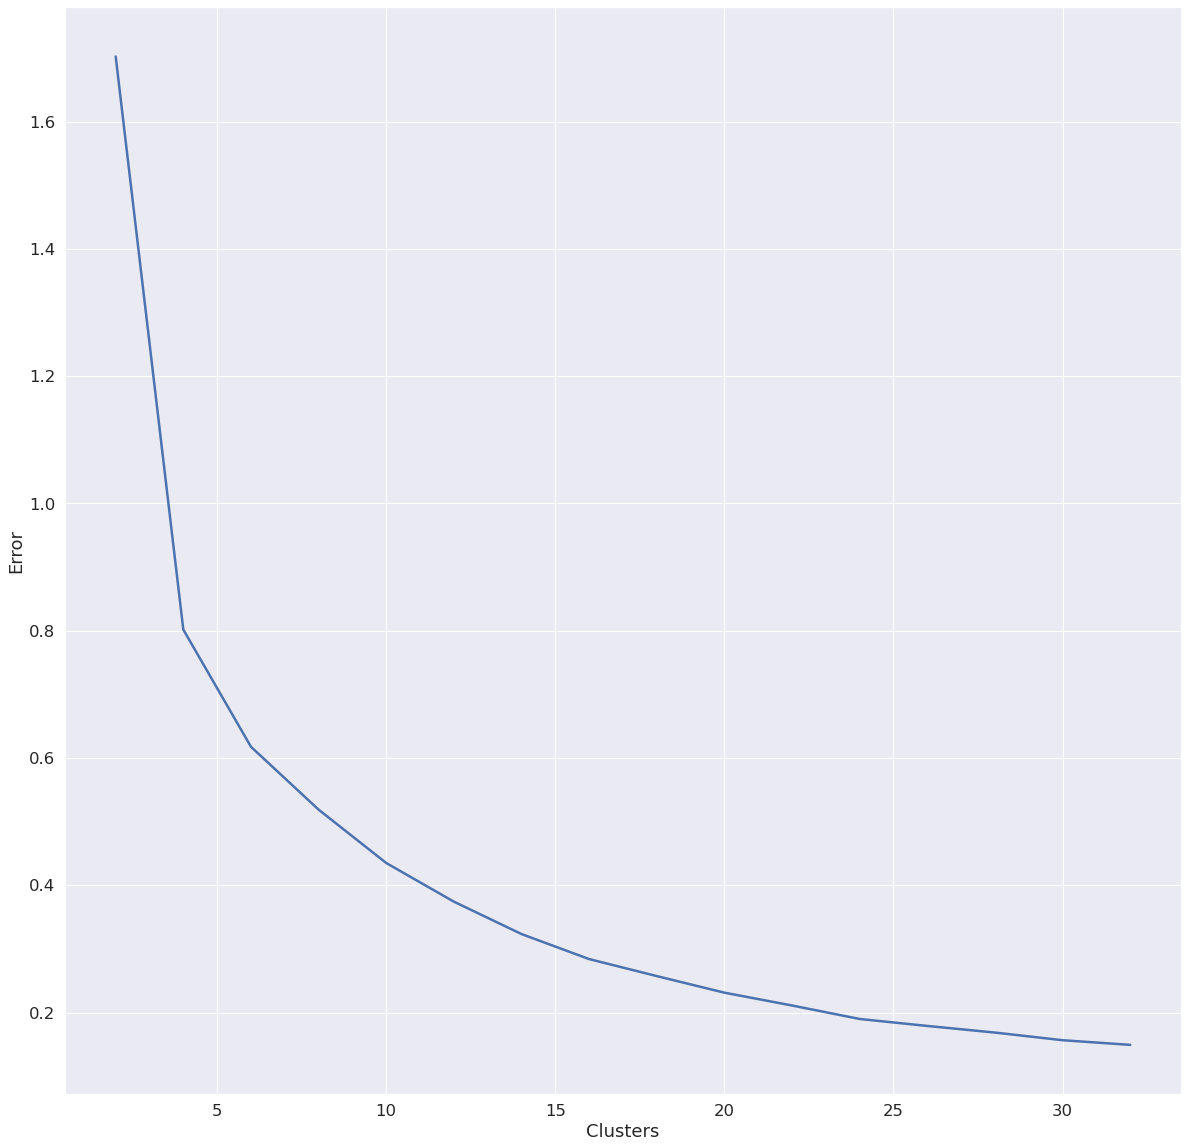

In [22]:
_ = _visualization.plot_cluster_errors(Ks,Js)

* It seems thare are too many columns, the number of clusters is almost the same of the number of samples

## Using a dendogram

We are using lastP as metric for the linkage method:

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

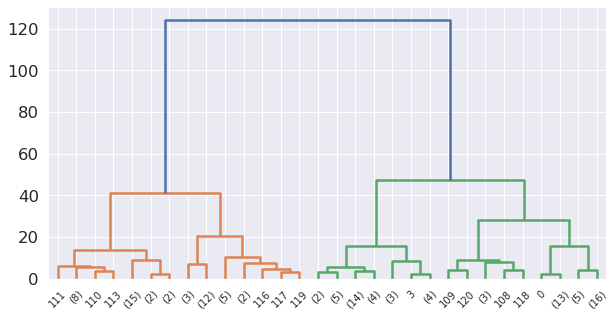

In [23]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(df_products_out)

In [24]:
clusters = _optimizer.fcluster_cut(df_products_out.values, max_d=2)
clusters.shape, len(np.unique(clusters))

((130,), 30)

In [25]:
df_products_out['hc_cluster'] = clusters

In [26]:
df_products_out[['kmeans_cluster', 'hc_cluster']].reset_index().groupby(['kmeans_cluster', 'hc_cluster']).count()

,,code
kmeans_cluster,hc_cluster,
0,8,3
1,14,1
2,10,5
3,9,12
4,13,1
5,12,1
6,4,1
7,11,2
8,1,8


In [27]:
df_products_out.drop(columns=['hc_cluster', 'kmeans_cluster']).to_csv('../data/products_features_exp2.csv')

/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

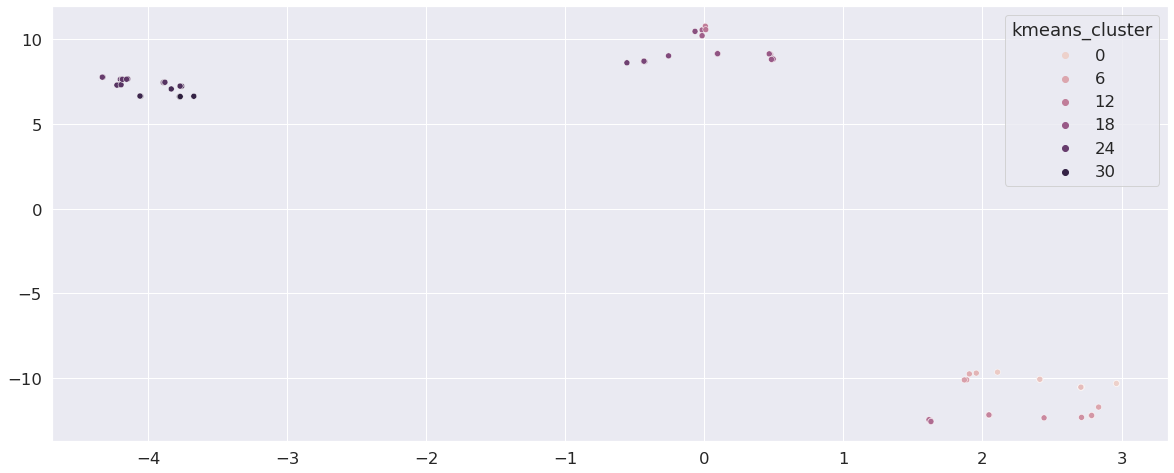

In [28]:
tsne_labels = _visualization.create_tsne_labels(df_products_out)
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['kmeans_cluster'])

/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

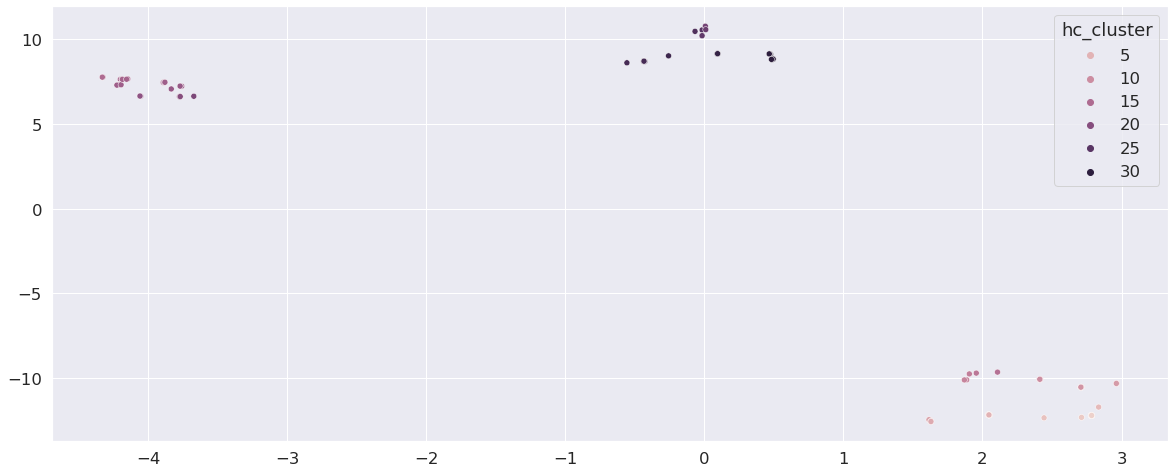

In [29]:
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['hc_cluster'])

## Metrics

In [30]:
_metrics.applyClusterMetrics(df_products_out,df_products_out.kmeans_cluster)

Davies Bouldin
0.22618849075689307

Calinski and Harabaz
3721.801289863713

Silhouette Score
0.6547763860188842



In [31]:
_metrics.applyClusterMetrics(df_products_out,df_products_out.hc_cluster)

Davies Bouldin
0.23214242692284576

Calinski and Harabaz
3465.3025822163427

Silhouette Score
0.6653129181078449

